##### Importar os dados do arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Exercícios/Sea Level Predictor/epa-sea-level.csv')

In [5]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


##### Gráfico de disperção entre 'Year' e 'CSIRO Adjusted Sea Level'.

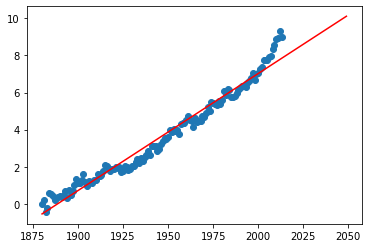

In [75]:
# Fazendo o gráfico de dispersão
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.scatter(x, y)

# Fazendo a Regressão Linear 
reg = linregress(x, y)

x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = reg.slope * x_pred + reg.intercept

plt.plot(x_pred, y_pred, 'r')
fig1 = plt.show()

fig1

##### Análise levando em consideração somente após os anos 2000.

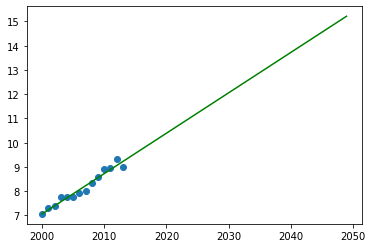

In [74]:
# Criando um novo DataFrame somente com os dados pós anos 2000
df2 = df.loc[df['Year'] >= 2000].reset_index(drop = True)

# Fazendo o gráfico de dispersão
x2 = df2['Year']
y2 = df2['CSIRO Adjusted Sea Level']

plt.scatter(x2, y2)

# Fazendo a Regressão Linear 
reg2 = linregress(x2, y2)

x2_pred = pd.Series([i for i in range(2000, 2051)])
y2_pred = reg2.slope * x2_pred + reg2.intercept

plt.plot(x2_pred, y2_pred, 'g')
fig2 = plt.show()

fig2

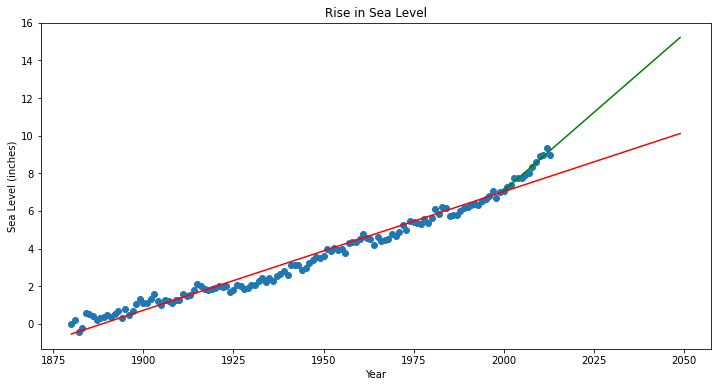

In [83]:
# Assimilando os 2 gráficos
fig, ax = plt.subplots(figsize = (12,6))

plt.scatter(x,y) # Dados medidos
plt.plot(x_pred, y_pred, 'r') # Previsão 1

plt.plot(x2_pred, y2_pred, 'g') # Previsão 2

ax.set(xlabel = 'Year', ylabel = 'Sea Level (inches)', title = 'Rise in Sea Level')

plt.show()